<a href="https://colab.research.google.com/github/JasonSCFu/Image_Processing_100_Questions/blob/master/Connected_Component_Labeling_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Connected component labeling

Component labeling is basically extracting a region from the original image, except that we try to find only the components which are connected” which is determined by the application of the graph theory.

OpenCV provides us with the following 4 functions for this task:

- cv2.connectedComponents
- cv2.connectedComponentsWithStats
- cv2.connectedComponentsWithAlgorithm
- cv2.connectedComponentsWithStatsWithAlgorithm

The bottom two are more efficient and faster but run only if you have parallel preprocessing with OpenCV enabled, otherwise it’s wiser to stick to the first two. Both the first and the second methods are the same except in the second method, as the name suggests, we get stats for each of the components, and we’ll use the second method because in most cases you’re going to need those stats.

#### Step 1: Image Loading and Preprocessing

In [4]:
import cv2
import numpy as np
 
 
# Loading the image
img = cv2.imread('/content/drive/MyDrive/OpenCV/connected_component.png')
 
# preprocess the image
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
# Applying 7x7 Gaussian Blur
blurred = cv2.GaussianBlur(gray_img, (7, 7), 0)

#### Step 2: Thresholding

In [5]:
# Applying threshold
threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

#### Step 3: Applying the Component Analysis Method

We first apply the cv2.connectedComponentsWithStats and then unpack the values it returns in different variables which we will use in the following steps, and let’s also create a new array to store all the components that we find.

In [6]:
# Apply the Component analysis function
analysis = cv2.connectedComponentsWithStats(threshold,4,cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis
 
# Initialize a new image to
# store all the output components
output = np.zeros(gray_img.shape, dtype="uint8")

#### Step 4: Filter Out Useful Components

Let’s loop through each of the components and use the statistics we got in the last step to filter out useful components. For example, here I have used the Area value to filter out only the characters in the image. And after filtering out the components, we’ll use the label_ids variable to create a mask for the component that we’re looping through and use the bitwise_or operation on the mask to generate our final output. 

In [16]:
# Loop through each component
for i in range(1, totalLabels):
   
      # Area of the component
    area = values[i, cv2.CC_STAT_AREA]
     
    if (area > 140) and (area < 400):
        # Create a new image for bounding boxes
        new_img=img.copy()
         
        # Now extract the coordinate points
        x1 = values[i, cv2.CC_STAT_LEFT]
        y1 = values[i, cv2.CC_STAT_TOP]
        w = values[i, cv2.CC_STAT_WIDTH]
        h = values[i, cv2.CC_STAT_HEIGHT]
         
        # Coordinate of the bounding box
        pt1 = (x1, y1)
        pt2 = (x1+ w, y1+ h)
        (X, Y) = centroid[i]
         
        # Bounding boxes for each component
        cv2.rectangle(new_img,pt1,pt2,(0, 255, 0), 3)
        cv2.circle(new_img, (int(X), int(Y)), 4, (0, 0, 255), -1)
 
        # Create a new array to show individual component
        component = np.zeros(gray_img.shape, dtype="uint8")
        componentMask = (label_ids == i).astype("uint8") * 255
 
        # Apply the mask using the bitwise operator
        component = cv2.bitwise_or(component,componentMask)
        output = cv2.bitwise_or(output, componentMask)

In [17]:
component

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### Step 5: Visualize The Final Output

In [13]:
from google.colab.patches import cv2_imshow


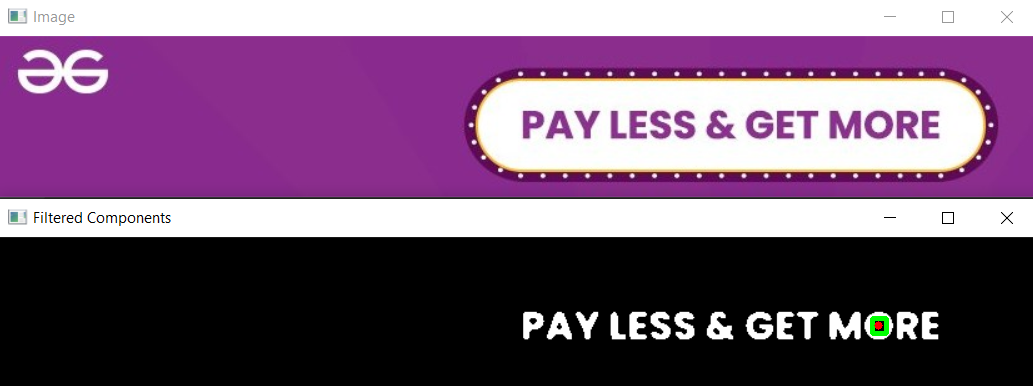

In [18]:
cv2_imshow(new_img)


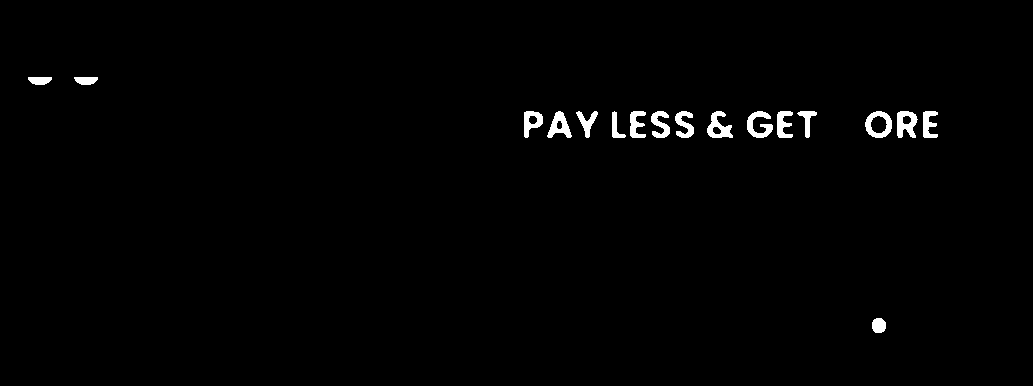

In [20]:
cv2_imshow(output)

##### reference: https://www.geeksforgeeks.org/python-opencv-connected-component-labeling-and-analysis/